## Starting the exploratory analysis




### 1 Importing the libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### 2 Reading the data

In [2]:
fidcs_info = pd.read_csv("IM_230626_semNP.csv")
assignors_info = pd.read_csv("IM_Cedente_230626_semNP.csv")
classes_info = pd.read_csv("IM_Classes_230626_semNP.csv")

/tmp/ipykernel_3137/756300242.py:1: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  fidcs_info = pd.read_csv("IM_230626_semNP.csv")


### 3 Data information

#### 3.1 Fidcs_Info

In [3]:
# head of fidcs_info
fidcs_info.head()

,ID_Participante,ID_Documento,SK_Documento,CNPJ,Data_Competencia,Data_Entrega,CNPJ_Administrador,Nome_Administrador,Forma_Condominio,Fundo_Exclusivo,...,Liquidez_Ate_30_Dias,Liquidez_Ate_60_Dias,Liquidez_Ate_90_Dias,Liquidez_Ate_180_Dias,Liquidez_Ate_360_Dias,Liquidez_Acima_360_Dias,Garantias_Valor_Total,Garantias_Percentual,Sistema_Origem,Nome_Fundo
0,164756,130046,FNET|130046,24331364000112,2020-11-30,2020-12-04,6.228539e+13,SINGULARE CORRETORA DE TÍTULOS E VALORES MOBIL...,FECHADO,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
1,164756,137253,FNET|137253,24331364000112,2020-12-31,2021-01-07,6.228539e+13,SINGULARE CORRETORA DE TÍTULOS E VALORES MOBIL...,FECHADO,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
2,164756,242626,FNET|242626,24331364000112,2021-11-30,2021-12-03,6.228539e+13,SINGULARE CORRETORA DE TITULOS E VALORES MOBIL...,FECHADO,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
3,164756,253264,FNET|253264,24331364000112,2021-12-31,2022-01-06,6.228539e+13,SINGULARE CORRETORA DE TITULOS E VALORES MOBIL...,FECHADO,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...
4,164756,263165,FNET|263165,24331364000112,2022-01-31,2022-02-07,6.228539e+13,SINGULARE CORRETORA DE TITULOS E VALORES MOBIL...,FECHADO,Não,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FNET,CIPA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...


In [4]:
# info of fidcs_info
fidcs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57301 entries, 0 to 57300
Columns: 321 entries, ID_Participante to Nome_Fundo
dtypes: float64(305), int64(3), object(13)
memory usage: 140.3+ MB


In [5]:
# shape of fidcs_info
fidcs_info.shape

(57301, 321)

In [6]:
# column values of fidcs_info
fidcs_info.columns.values

array(['ID_Participante', 'ID_Documento', 'SK_Documento', 'CNPJ',
       'Data_Competencia', 'Data_Entrega', 'CNPJ_Administrador',
       'Nome_Administrador', 'Forma_Condominio', 'Fundo_Exclusivo',
       'Cotistas_Vinculados_Interesse', 'Prazo_Conversao_Cotas',
       'Tipo_Prazo_Conversao_Cotas', 'Prazo_Pagamento_Resgate',
       'Tipo_Prazo_Pagamento_Resgate', 'Ativo', 'Ativo_Disponibilidades',
       'Ativo_Carteira', 'Ativo_Direitos_Aquisicao',
       'Ativo_Direitos_Aquisicao_Creditos_Vencer_Adimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes',
       'Ativo_Direitos_Aquisicao_Parcelas_Inadimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Inadimplentes',
       'Ativo_Direitos_Aquisicao_Creditos_Performar',
       'Ativo_Direitos_Aquisicao_Creditos_Vencidos_Pendentes',
       'Ativo_Direitos_Aquisicao_Creditos_Empresas_Recuperacao',
       'Ativo_Direitos_Aquisicao_Creditos_Receitas_Publicas',
       'Ativo_Direitos_Aquisicao_Creditos_Acoes_Judiciais

In [7]:
# numerical columns of fidcs_info
fidc_numerical_columns = fidcs_info.select_dtypes(include=['int', 'float']).columns

# categorical columns of fidcs_info
fidc_categorical_columns = fidcs_info.select_dtypes(include=['object']).columns

In [8]:
fidc_numerical_columns

Index(['ID_Participante', 'ID_Documento', 'CNPJ', 'CNPJ_Administrador',
       'Prazo_Conversao_Cotas', 'Prazo_Pagamento_Resgate', 'Ativo',
       'Ativo_Disponibilidades', 'Ativo_Carteira', 'Ativo_Direitos_Aquisicao',
       ...
       'Numero_Cotistas_Subordinada_Outros', 'Liquidez_Imediata',
       'Liquidez_Ate_30_Dias', 'Liquidez_Ate_60_Dias', 'Liquidez_Ate_90_Dias',
       'Liquidez_Ate_180_Dias', 'Liquidez_Ate_360_Dias',
       'Liquidez_Acima_360_Dias', 'Garantias_Valor_Total',
       'Garantias_Percentual'],
      dtype='object', length=308)

In [9]:
fidc_categorical_columns

Index(['SK_Documento', 'Data_Competencia', 'Data_Entrega',
       'Nome_Administrador', 'Forma_Condominio', 'Fundo_Exclusivo',
       'Cotistas_Vinculados_Interesse', 'Tipo_Prazo_Conversao_Cotas',
       'Tipo_Prazo_Pagamento_Resgate',
       'Taxas_Direitos_Aquisicao_Desconto_Compra_Media_Ponderada',
       'Taxas_Direitos_Aquisicao_Desconto_Compra_Maxima', 'Sistema_Origem',
       'Nome_Fundo'],
      dtype='object')

In [10]:
# checking all nulls in fidcs_info
fidcs_info.isnull().sum()

ID_Participante                0
ID_Documento                   0
SK_Documento                   0
CNPJ                           0
Data_Competencia               0
                           ...  
Liquidez_Acima_360_Dias    10440
Garantias_Valor_Total      27845
Garantias_Percentual       27849
Sistema_Origem                 0
Nome_Fundo                     0
Length: 321, dtype: int64

In [11]:
# checking the column with the most nulls in fidcs_info
fidcs_info.isnull().sum().idxmax()

'Prazo_Pagamento_Resgate'

In [12]:
# checking the percentage of nulls in fidcs_info
fidcs_info.isnull().sum() / fidcs_info.shape[0]

ID_Participante            0.000000
ID_Documento               0.000000
SK_Documento               0.000000
CNPJ                       0.000000
Data_Competencia           0.000000
                             ...   
Liquidez_Acima_360_Dias    0.182196
Garantias_Valor_Total      0.485943
Garantias_Percentual       0.486012
Sistema_Origem             0.000000
Nome_Fundo                 0.000000
Length: 321, dtype: float64

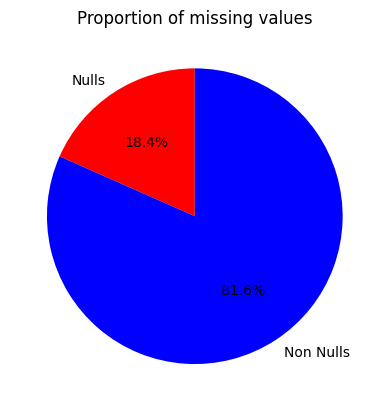

In [45]:
# calculating the sum of nulls
fidc_info_valores_nulos = fidcs_info.isnull().sum()

# calculating the sum of not nulls 
fidc_info_valores_nao_nulos = fidcs_info.notnull().sum()

rotulos = ['Nulls', 'Non Nulls']

# creating a list with the sum of nulls and not nulls 
contagens = [fidc_info_valores_nulos.sum(), fidc_info_valores_nao_nulos.sum()]

# plotting the graph
plt.pie(contagens, labels=rotulos, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])

# adding a title
plt.title('Proportion of missing values')

# showing the graph
plt.show()

In [14]:
# describing fidcs_info 
fidcs_info.describe()

,ID_Participante,ID_Documento,CNPJ,CNPJ_Administrador,Prazo_Conversao_Cotas,Prazo_Pagamento_Resgate,Ativo,Ativo_Disponibilidades,Ativo_Carteira,Ativo_Direitos_Aquisicao,...,Numero_Cotistas_Subordinada_Outros,Liquidez_Imediata,Liquidez_Ate_30_Dias,Liquidez_Ate_60_Dias,Liquidez_Ate_90_Dias,Liquidez_Ate_180_Dias,Liquidez_Ate_360_Dias,Liquidez_Acima_360_Dias,Garantias_Valor_Total,Garantias_Percentual
count,57301.000000,5.730100e+04,5.730100e+04,5.721700e+04,7558.000000,7143.000000,5.730100e+04,5.730100e+04,5.730100e+04,5.730100e+04,...,29102.000000,4.772300e+04,4.655400e+04,4.618900e+04,4.606100e+04,4.611100e+04,4.606700e+04,4.686100e+04,2.945600e+04,2.945200e+04
mean,144590.782063,3.842505e+07,2.352613e+13,3.943763e+13,8.863059,9.238275,1.688294e+08,3.881057e+05,1.655361e+08,6.710110e+07,...,0.755171,1.298788e+07,1.792942e+07,8.274830e+06,5.209433e+06,1.146407e+07,5.017653e+06,2.944892e+07,7.896701e+06,1.911311e+04
std,41383.106641,3.645301e+07,1.133995e+13,2.417907e+13,55.371850,44.500458,5.413754e+08,5.956344e+06,5.316416e+08,2.460075e+08,...,11.958295,7.631714e+07,1.446474e+08,6.582927e+07,4.331052e+07,9.744127e+07,3.767243e+07,2.674395e+08,7.127806e+07,3.278920e+06
min,41168.000000,1.297280e+05,5.285819e+12,6.667000e+10,0.000000,0.000000,-6.045810e+04,-2.543715e+08,-6.123566e+04,0.000000e+00,...,0.000000,-5.904826e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.810171e+06,0.000000e+00,-1.000000e-02
25%,112864.000000,3.377240e+05,1.309886e+13,1.348679e+13,0.000000,0.000000,9.771441e+06,1.000000e+03,8.884830e+06,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,146879.000000,3.840998e+07,2.294578e+13,4.206626e+13,1.000000,0.000000,3.979782e+07,3.799410e+03,3.780690e+07,6.174150e+05,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,173553.000000,7.431166e+07,3.136883e+13,6.228539e+13,1.000000,1.000000,1.303667e+08,2.700819e+04,1.270185e+08,3.008012e+07,...,0.000000,1.746875e+06,1.617622e+06,3.328559e+05,6.874321e+04,1.515931e+04,0.000000e+00,5.131406e+05,0.000000e+00,0.000000e+00
max,232259.000000,1.044774e+08,9.754877e+13,9.290456e+13,1260.000000,365.000000,1.952008e+10,1.021099e+09,1.951853e+10,8.293406e+09,...,560.000000,4.963699e+09,6.579210e+09,3.723954e+09,2.255878e+09,3.612698e+09,1.873463e+09,1.928390e+10,3.363709e+09,5.627146e+08


#### 3.2 Plotting graphs

##### 3.2.1 Correlation "Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes" and "Ativo_Direitos_Aquisicao_Provisao_Reducao"


In [15]:
# list of column names related to the acquisition method
fidcs_correlation_forma_aquisicao = [
    "Ativo_Direitos_Aquisicao_Creditos_Vencer_Inadimplentes",
    "Ativo_Direitos_Aquisicao_Provisao_Reducao"
]

# select columns from the fidcs_info dataframe based on the provided list
fidcs_correlation_selected_columns = fidcs_info[fidcs_correlation_forma_aquisicao]

# calculate the correlation matrix for the selected columns
fidcs_forma_aquisicao_correlation_matrix = fidcs_correlation_selected_columns.corr(
    # the correlation matrix is calculated using the corr() method
    # the result is a table that shows the correlation coefficients between pairs of columns
)

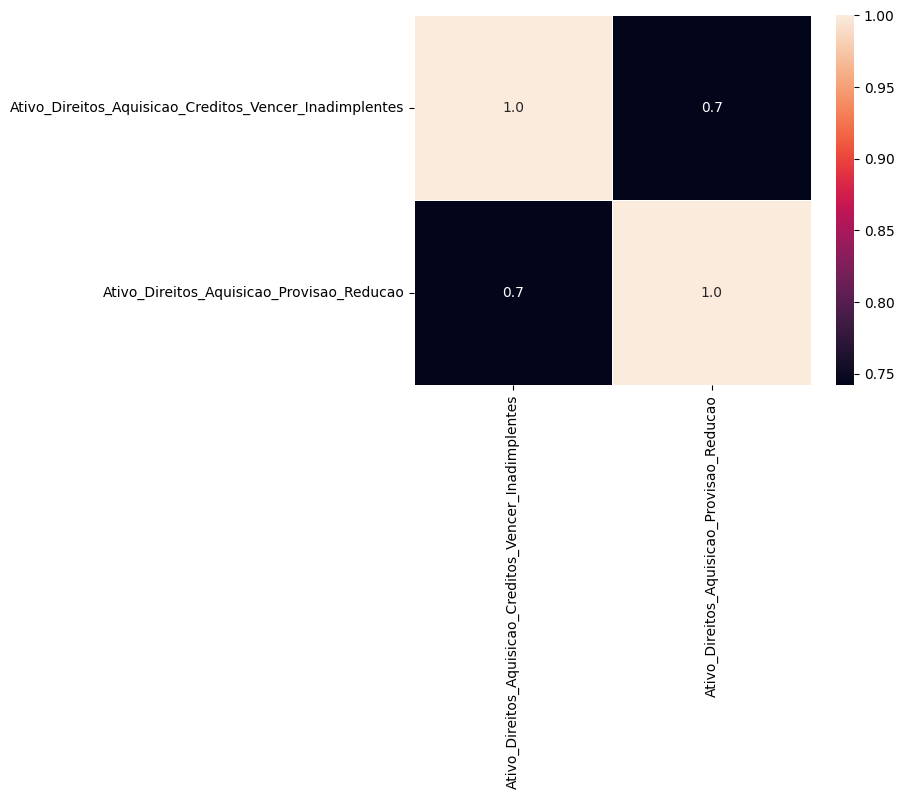

In [16]:
# create a heatmap to visualize the correlation matrix
correlation_plot = sns.heatmap(
    fidcs_forma_aquisicao_correlation_matrix,    # the correlation matrix to visualize
    annot=True,                                 # display correlation values on the heatmap
    fmt=".1f",                                  # format for displaying values (one decimal place)
    linewidths=.6                               # width of lines between cells in the heatmap
)

###### Pie graph "Liquidez_Ate_360_Dias" and "Liquidez_Acima_360_Dias"

In [17]:
# list of column names related to liquidity within 360 days
liquidy_360 = ["Liquidez_Ate_360_Dias"]

# list of column names related to liquidity after 360 days
liquidy_after_360 = ["Liquidez_Acima_360_Dias"]

In [18]:
# select columns related to liquidity within 360 days from the fidcs_info dataframe
fidcs_liquidy_360 = fidcs_info[liquidy_360]

# select columns related to liquidity after 360 days from the fidcs_info dataframe
fidcs_liquidy_after_360 = fidcs_info[liquidy_after_360]

In [19]:
# fill missing values with 0 for the fidcs_liquidy_360 dataframe
fidcs_liquidy_360 = fidcs_liquidy_360.fillna(0)

# fill missing values with 0 for the fidcs_liquidy_after_360 dataframe
fidcs_liquidy_after_360 = fidcs_liquidy_after_360.fillna(0)

In [20]:
# calculate the sum of values for each column in the fidcs_liquidy_360 dataframe
sum_fidcs_liquidy_360_separated = fidcs_liquidy_360.sum()

# calculate the sum of values for each column in the fidcs_liquidy_after_360 dataframe
sum_fidcs_liquidy_after_360_separated = fidcs_liquidy_after_360.sum()

In [21]:
# calculate the sum of values for all columns in the fidcs_liquidy_360 dataframe
sum_fidcs_liquidy_360 = sum_fidcs_liquidy_360_separated.sum()

# calculate the sum of values for all columns in the fidcs_liquidy_after_360_separated dataframe
sum_fidcs_liquidy_after_360_separated = sum_fidcs_liquidy_360_separated.sum()

In [22]:
# create a list containing the calculated sum of liquidity values
liquidy_df = [sum_fidcs_liquidy_360, sum_fidcs_liquidy_after_360_separated]

([<matplotlib.patches.Wedge at 0x7f25cbeaaad0>,
 [Text(6.735557395310444e-17, 1.1, 'Liquidity up to 360'),
  Text(-2.0206672185931328e-16, -1.1, 'Liquidity after 360')])

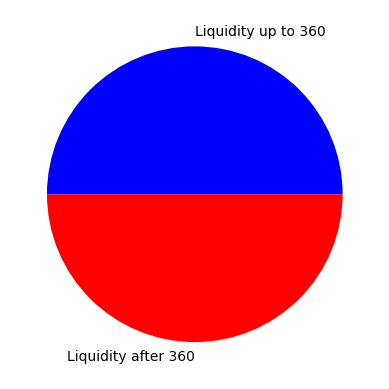

In [23]:
# create a pie chart to visualize the summed liquidity values
plt.pie(
    liquidy_df,                      # data for the pie chart
    labels=["Liquidity up to 360", "Liquidity after 360"],   # labels for the pie chart segments
    colors=["blue", "red"]             # colors for the segments
)


#### 3.3 Assignors_Info

In [24]:
# head of assignors_info
assignors_info.head()

,SK_Documento,Item,Sequencial,CPF_CNPJ_Cedente,Participacao_Percentual
0,FNET|129728,Direitos Creditórios sem Aquisição Substancial...,1,1.000000e+14,0.0
1,FNET|129900,Direitos Creditórios sem Aquisição Substancial...,1,1.000000e+14,0.0
2,FNET|129903,Direitos Creditórios sem Aquisição Substancial...,1,1.000000e+14,0.0
3,FNET|129904,Direitos Creditórios sem Aquisição Substancial...,1,1.000000e+14,0.0
4,FNET|129996,Direitos Creditórios sem Aquisição Substancial...,1,1.000000e+14,0.0


In [25]:
# info of assignors_info
assignors_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56148 entries, 0 to 56147
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SK_Documento             56148 non-null  object 
 1   Item                     56148 non-null  object 
 2   Sequencial               56148 non-null  int64  
 3   CPF_CNPJ_Cedente         56146 non-null  float64
 4   Participacao_Percentual  56143 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ MB


In [26]:
# shape of assignors_info
assignors_info.shape

(56148, 5)

In [27]:
# column values of assignors_info
assignors_info.columns.values

array(['SK_Documento', 'Item', 'Sequencial', 'CPF_CNPJ_Cedente',
       'Participacao_Percentual'], dtype=object)

In [28]:
# numerical columns of assignors_info
assignors_numerical_columns = assignors_info.select_dtypes(include=['int', 'float']).columns

# categorical columns of assignors_info
assignors_categorical_columns = assignors_info.select_dtypes(include=['object']).columns

In [29]:
assignors_numerical_columns

Index(['Sequencial', 'CPF_CNPJ_Cedente', 'Participacao_Percentual'], dtype='object')

In [30]:
assignors_categorical_columns

Index(['SK_Documento', 'Item'], dtype='object')

In [31]:
# checking all nulls in assignors_info
assignors_info.isnull().sum()

SK_Documento               0
Item                       0
Sequencial                 0
CPF_CNPJ_Cedente           2
Participacao_Percentual    5
dtype: int64

In [32]:
# checking the column with the most nulls in assignors_info
assignors_info.isnull().sum().idxmax()

'Participacao_Percentual'

In [33]:
# checking the percentage of nulls in assignors_info
assignors_info.isnull().sum() / fidcs_info.shape[0]

SK_Documento               0.000000
Item                       0.000000
Sequencial                 0.000000
CPF_CNPJ_Cedente           0.000035
Participacao_Percentual    0.000087
dtype: float64

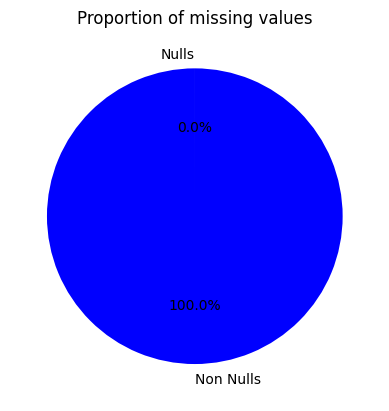

In [47]:
# calculating the sum of nulls
assignors_info_valores_nulos = assignors_info.isnull().sum()

# calculating the sum of not nulls 
assignors_info_valores_nao_nulos = assignors_info.notnull().sum()

rotulos = ['Nulls', 'Non Nulls']

# creating a list with the sum of nulls and not nulls 
contagens = [assignors_info_valores_nulos.sum(), assignors_info_valores_nao_nulos.sum()]

# plotting the graph
plt.pie(contagens, labels=rotulos, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])

# adding a title
plt.title('Proportion of missing values')

# showing the graph
plt.show()

In [34]:
# describing assignors_info
assignors_info.describe()

,Sequencial,CPF_CNPJ_Cedente,Participacao_Percentual
count,56148.000000,5.614600e+04,5.614300e+04
mean,1.521087,5.671954e+13,2.249780e+06
std,1.212068,4.107888e+13,3.315086e+08
min,1.000000,0.000000e+00,0.000000e+00
25%,1.000000,1.158134e+13,0.000000e+00
50%,1.000000,5.927461e+13,1.175000e+01
75%,2.000000,1.000000e+14,3.260500e+01
max,10.000000,1.000000e+14,5.586875e+10


#### 1.3.2 Classes_Info

In [35]:
# head of classes_info
classes_info.head()

,SK_Documento,Classe_Serie,Numero_Cotistas,Quantidade_Cotas,Valor_Cota,Rentabilidade,Valor_Total_Captado,Quantidade_Cotas_Emitidas,Valor_Total_Resgates,Quantidade_Cotas_Resgatadas,Valor_A_Pagar,Quantidade_Cotas_A_Resgatar,Valor_Amortizado_Cota,Valor_Total_Amortizacao,Desempenho_Esperado,Desempenho_Realizado
0,FNET|129903,Sênior 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FNET|130008,Sênior 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FNET|130017,Sênior 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FNET|130028,Sênior 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FNET|130035,Sênior 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# info of classes_info
classes_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178502 entries, 0 to 178501
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_Documento                 178502 non-null  object 
 1   Classe_Serie                 178502 non-null  object 
 2   Numero_Cotistas              171440 non-null  float64
 3   Quantidade_Cotas             161199 non-null  float64
 4   Valor_Cota                   161111 non-null  float64
 5   Rentabilidade                169001 non-null  float64
 6   Valor_Total_Captado          138291 non-null  float64
 7   Quantidade_Cotas_Emitidas    138280 non-null  float64
 8   Valor_Total_Resgates         135167 non-null  float64
 9   Quantidade_Cotas_Resgatadas  135161 non-null  float64
 10  Valor_A_Pagar                133905 non-null  float64
 11  Quantidade_Cotas_A_Resgatar  133901 non-null  float64
 12  Valor_Amortizado_Cota        139672 non-null  float64
 13 

In [37]:
# shape of classes_info
classes_info.shape

(178502, 16)

In [38]:
# column values of classes_info
classes_info.columns.values

array(['SK_Documento', 'Classe_Serie', 'Numero_Cotistas',
       'Quantidade_Cotas', 'Valor_Cota', 'Rentabilidade',
       'Valor_Total_Captado', 'Quantidade_Cotas_Emitidas',
       'Valor_Total_Resgates', 'Quantidade_Cotas_Resgatadas',
       'Valor_A_Pagar', 'Quantidade_Cotas_A_Resgatar',
       'Valor_Amortizado_Cota', 'Valor_Total_Amortizacao',
       'Desempenho_Esperado', 'Desempenho_Realizado'], dtype=object)

In [39]:
# numerical columns of classes_info
classes_numerical_columns = classes_info.select_dtypes(include=['int', 'float']).columns

# categorical columns of classes_info
classes_categorical_columns = classes_info.select_dtypes(include=['object']).columns

In [40]:
classes_numerical_columns

Index(['Numero_Cotistas', 'Quantidade_Cotas', 'Valor_Cota', 'Rentabilidade',
       'Valor_Total_Captado', 'Quantidade_Cotas_Emitidas',
       'Valor_Total_Resgates', 'Quantidade_Cotas_Resgatadas', 'Valor_A_Pagar',
       'Quantidade_Cotas_A_Resgatar', 'Valor_Amortizado_Cota',
       'Valor_Total_Amortizacao', 'Desempenho_Esperado',
       'Desempenho_Realizado'],
      dtype='object')

In [41]:
classes_categorical_columns

Index(['SK_Documento', 'Classe_Serie'], dtype='object')

In [42]:
# checking all nulls in classes_info
classes_info.isnull().sum()

SK_Documento                       0
Classe_Serie                       0
Numero_Cotistas                 7062
Quantidade_Cotas               17303
Valor_Cota                     17391
Rentabilidade                   9501
Valor_Total_Captado            40211
Quantidade_Cotas_Emitidas      40222
Valor_Total_Resgates           43335
Quantidade_Cotas_Resgatadas    43341
Valor_A_Pagar                  44597
Quantidade_Cotas_A_Resgatar    44601
Valor_Amortizado_Cota          38830
Valor_Total_Amortizacao        38824
Desempenho_Esperado            67575
Desempenho_Realizado           24186
dtype: int64

In [43]:
# checking the column with the most nulls in classes_info
classes_info.isnull().sum().idxmax()

'Desempenho_Esperado'

In [48]:
# checking the percentage of nulls in classes_info
classes_info.isnull().sum() / fidcs_info.shape[0]

SK_Documento                   0.000000
Classe_Serie                   0.000000
Numero_Cotistas                0.123244
Quantidade_Cotas               0.301967
Valor_Cota                     0.303503
Rentabilidade                  0.165809
Valor_Total_Captado            0.701750
Quantidade_Cotas_Emitidas      0.701942
Valor_Total_Resgates           0.756270
Quantidade_Cotas_Resgatadas    0.756374
Valor_A_Pagar                  0.778294
Quantidade_Cotas_A_Resgatar    0.778363
Valor_Amortizado_Cota          0.677650
Valor_Total_Amortizacao        0.677545
Desempenho_Esperado            1.179299
Desempenho_Realizado           0.422087
dtype: float64

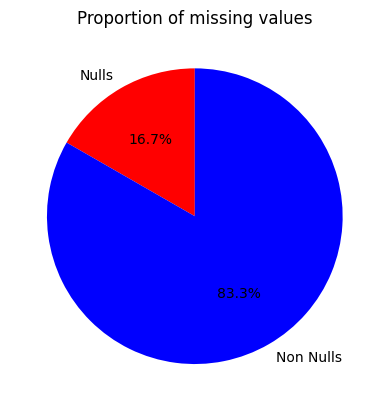

In [49]:
# calculating the sum of nulls
classes_info_valores_nulos = classes_info.isnull().sum()

# calculating the sum of not nulls 
classes_info_valores_nao_nulos = classes_info.notnull().sum()

rotulos = ['Nulls', 'Non Nulls']

# creating a list with the sum of nulls and not nulls 
contagens = [classes_info_valores_nulos.sum(), classes_info_valores_nao_nulos.sum()]

# plotting the graph
plt.pie(contagens, labels=rotulos, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])

# adding a title
plt.title('Proportion of missing values')

# showing the graph
plt.show()

In [44]:
# describing classes_info
classes_info.describe()

,Numero_Cotistas,Quantidade_Cotas,Valor_Cota,Rentabilidade,Valor_Total_Captado,Quantidade_Cotas_Emitidas,Valor_Total_Resgates,Quantidade_Cotas_Resgatadas,Valor_A_Pagar,Quantidade_Cotas_A_Resgatar,Valor_Amortizado_Cota,Valor_Total_Amortizacao,Desempenho_Esperado,Desempenho_Realizado
count,171440.000000,1.611990e+05,1.611110e+05,1.690010e+05,1.382910e+05,1.382800e+05,1.351670e+05,1.351610e+05,1.339050e+05,1.339010e+05,1.396720e+05,1.396780e+05,1.109270e+05,1.543160e+05
mean,13.395141,5.968865e+08,3.384618e+10,4.531761e+09,5.245803e+09,5.785223e+10,1.078672e+09,1.230780e+09,8.540075e+04,1.335010e+08,6.190434e+05,7.039052e+07,2.384093e+05,4.908067e+09
std,291.727593,1.277250e+11,3.634312e+12,1.841295e+12,1.949580e+12,5.702335e+12,3.943996e+11,2.632556e+11,3.968175e+06,3.319516e+10,2.235528e+08,1.513736e+10,4.822000e+07,1.926801e+12
min,0.000000,-9.200000e+04,-1.221921e+04,-4.108352e+10,0.000000e+00,0.000000e+00,-2.750606e+05,-2.720000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.204992e+05,-1.204992e+05
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,1.963376e+03,1.000000e+03,4.800000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e-01,5.100000e-01
75%,4.000000,2.026969e+04,1.574676e+03,1.290000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.110000e+00,1.300000e+00
max,112057.000000,4.680014e+13,7.740136e+14,7.569066e+14,7.250000e+14,8.610792e+14,1.450000e+14,7.462871e+13,3.977817e+08,9.109100e+12,8.354071e+10,5.000000e+12,1.114503e+10,7.569066e+14
